# Homework 3 - Duc Trinh 

In [1]:
import pandas as pd

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import numpy as np

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [5]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## Exercise 1 

### a) 

In [7]:
redWine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter = ";")

In [8]:
redWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
numeric_data = redWine.values

In [10]:
numeric_data

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [11]:
numeric_data.shape

(1599, 12)

In [12]:
wine_labels = np.zeros(len(numeric_data))
for i in range(len(numeric_data)):
    if (numeric_data[i][11] >= 7):
        wine_labels[i] = 1
    else:
        wine_labels[i] = 0
wine_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
wine_attrs = np.delete(numeric_data, 11, 1)
wine_attrs

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

### b)

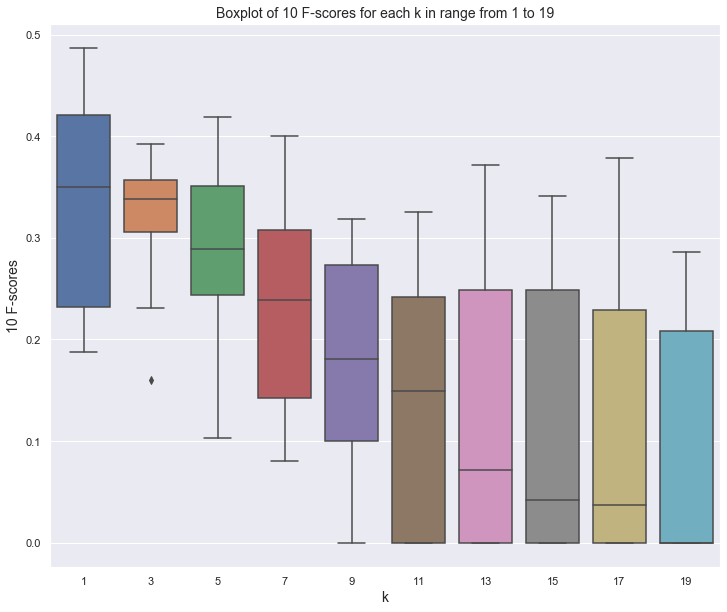

In [14]:
plt.figure(figsize = (12, 10))
plt.title(label = "Boxplot of 10 F-scores for each k in range from 1 to 19", fontsize = 14)
plt.xlabel(xlabel = "k", fontsize = 14)
plt.ylabel(ylabel = "10 F-scores", fontsize = 14)
_ = sns.boxplot(x=list(range (1, 21, 2)), y=[cross_val_score(KNeighborsClassifier(n_neighbors=k,metric="euclidean"), X = wine_attrs, y = wine_labels, cv=10, scoring = 'f1') for k in range (1, 21,2)])

Based on the boxplots, it seems like I should choose k=  1 since it produces the best boxplot of F1-scores (highest max among other k as well as a pretty small range). However, I think k = 1 produces the best F1-scores solely due to it being too sensitive to noises. I would choose k = 3 as it has similar median for its F1-scores as the ones produced by k = 1 while having smaller range and probably less bias.

### c)

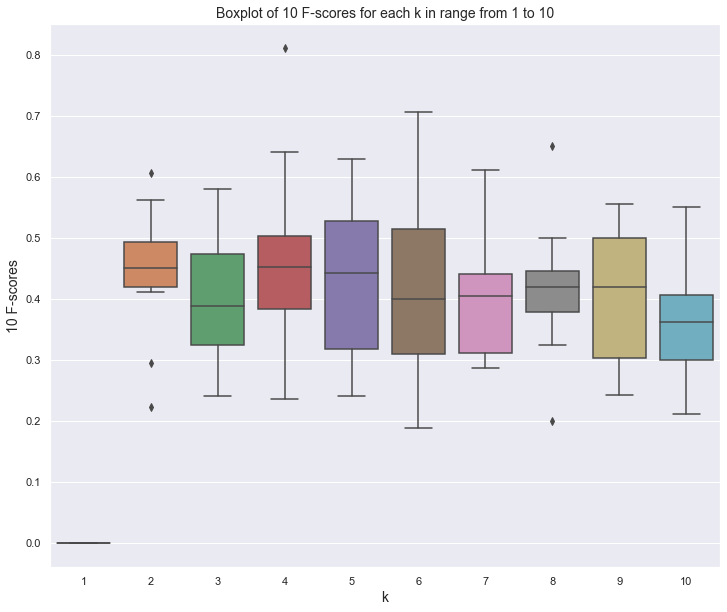

In [15]:
plt.figure(figsize = (12, 10))
plt.title(label = "Boxplot of 10 F-scores for each k in range from 1 to 10", fontsize = 14)
plt.xlabel(xlabel = "k", fontsize = 14)
plt.ylabel(ylabel = "10 F-scores", fontsize = 14)
_ = sns.boxplot(x=list(range (1, 11, 1)), y=[cross_val_score(DecisionTreeClassifier(max_depth = k), X = wine_attrs, y = wine_labels, cv=10, scoring = 'f1') for k in range (1, 11,1)])

I would choose k = 5 since it seems like its classifier produces the best F1-scores (the max of this boxplot is very high as well as high median). For k > 5, the F1-scores seems to be decreasing (their medians are lower and the boxplots shift down). For k < 5, the F1-scores seems to be increasing (their medians are higher and the boxplots shift up). This gives me reason to believe k = 5 gives the classifier the best F1-scores as it seems like this is the break-off point.

## Exercise 2

Using predictive analytics methods, we would like to identify first-year college students at risk of dropping out and academic failure. Write a one-page long essay covering the following points!

a) Design the analysis, think through the stages of the analysis following CRISP-DM methodology! How can you state the problem as a data science problem? What machine learning approaches could be used here? (See Lecture 2)

The problem is a binary classification problem. It will be a supervised learning task due to the fact that the label of the data is known as we knew whether the students of previous years dropped out or not. The problem is a classification task because the goal is to predict a discrete value for each incoming student based on their profile. Specifically, we are predicting whether that student will drop out or not so there are two possible values for our label making it a binary classification task.

b) Do you think that the requirements of a successful data science projects are met? Go through the 7 requirements that we have covered in class! (See Lecture 02!)

c) What ethical questions are raised in this project? Mention utilizations that you think are useful and ethical and give examples of bad applications as well!